In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math, os
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
# from xgboost import XGBRegressor

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from seaborn import heatmap

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [2]:
# #Only need this to set new categories 
# df = pd.read_csv('interpolated_full.csv')

# def setCategoryValue(x): # takes an input of 'threshold' 
#     if x <= 10: 
#         return 0
#     return 1 

# df['electric_category'] = df['Percentage Electrified'].apply(lambda x: setCategoryValue(x))
# df.to_csv('labeled_data.csv')

In [5]:
df = pd.read_csv('labeled_data.csv')
for col_name in df.columns:
        if str(col_name[:7]) == 'Unnamed':
            del df[col_name]
df.head()

,Census 2011 ID,Village Name,District Name,State Name,Number of Households,Number of Electrified Households,Percentage Electrified,min,10th_percentile,median,...,rain_apr_90th,rain_may_90th,rain_jun_90th,rain_jul_90th,rain_aug_90th,rain_sep_90th,rain_oct_90th,rain_nov_90th,rain_dec_90th,electric_category
0,215989,Kalapani,Pashchim Champaran,Bihar,445.0,42.0,9.438202,0.203942,0.265501,0.324645,...,6.594600,161.125992,404.962189,313.394196,150.465591,185.114197,236.949799,0.0,0.0,0
1,215991,Tharhi,Pashchim Champaran,Bihar,339.0,214.0,63.126844,0.086101,0.172867,0.260938,...,2.347200,156.473602,435.340790,363.004578,140.212402,170.389389,259.703400,0.0,0.0,1
2,215992,Pipra,Pashchim Champaran,Bihar,107.0,59.0,55.140187,0.370665,0.425144,0.872517,...,6.594600,161.125992,404.962189,313.394196,150.465591,185.114197,236.949799,0.0,0.0,1
3,215993,Kotaraha,Pashchim Champaran,Bihar,128.0,64.0,50.000000,0.225840,0.274397,0.424527,...,11.802399,161.125992,450.330780,313.394196,150.465591,185.114197,236.949799,0.0,0.0,1
4,215995,Lachhmipur,Pashchim Champaran,Bihar,615.0,449.0,73.008130,0.211082,0.281324,0.339738,...,11.802399,111.039795,450.330780,294.492981,128.941193,134.973999,199.388794,0.0,0.0,1


In [1]:
print (df.shape)
df.info()

NameError: name 'df' is not defined

In [7]:
print (len(df['Census 2011 ID'].values))
print (len(set(df['Census 2011 ID'].values)))

33391
32590


In [9]:
df = df.drop_duplicates(subset = 'Census 2011 ID', keep = 'first')
print (len(df['Census 2011 ID'].values))
print (len(set(df['Census 2011 ID'].values)))

32590
32590


In [10]:
# # Keep full df for later
# scaler = MinMaxScaler(feature_range=(0, 1))

# df_full = df.copy()
# all_X = df_full.drop(['Census 2011 ID', 'Percentage Electrified', 'Number of Electrified Households', 
#                       'Village Name','District Name','State Name', 'electric_category'], axis = 1)
# all_X_scaled = pd.DataFrame(scaler.transform(all_X), columns = all_X.columns)
# all_Y = df_full[['electric_category']].values 
# print (all_X_scaled.shape)

# Train test split 
df, test_data_df = train_test_split(df, test_size=0.2)
print ('Train Shape', df.shape, 'Test Shape', test_data_df.shape)
print ('Train Classes')
print (df.electric_category.value_counts())
print ('Train Classes')
print (test_data_df.electric_category.value_counts())

Train Shape (26072, 346) Test Shape (6518, 346)
Train Classes
1    24355
0     1717
Name: electric_category, dtype: int64
Train Classes
1    6076
0     442
Name: electric_category, dtype: int64


In [11]:
df0 = df[df.electric_category == 0]
df1 = df[df.electric_category == 1]

print ('Sizes before sampling: ', df1.shape, df0.shape)

df0 = resample(df0, 
                replace=True,     # sample with replacement
                n_samples=12000,  # to match majority class, Was 10000 
                random_state=123) # reproducible results. 

df1 = resample(df1, n_samples = 12000)
df = pd.concat([df1, df0])

print ('Train Shape', df.shape, 'Test Shape', test_data_df.shape)
print ('New Train Classes')
print (df.electric_category.value_counts())
print ('New Train Classes')
print (test_data_df.electric_category.value_counts())

Sizes before sampling:  (24355, 346) (1717, 346)
Train Shape (24000, 346) Test Shape (6518, 346)
New Train Classes
1    12000
0    12000
Name: electric_category, dtype: int64
New Train Classes
1    6076
0     442
Name: electric_category, dtype: int64


In [12]:
a = [x for x in df['Census 2011 ID'].values if x in test_data_df['Census 2011 ID'].values]
print (a)

[]


In [13]:
#scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
# Training 
X_training = df.drop(['Census 2011 ID', 'Percentage Electrified', 'Number of Electrified Households', 
                      'Village Name','District Name','State Name', 'electric_category'], axis = 1)
X_training_scaled = pd.DataFrame(scaler.fit_transform(X_training), columns = X_training.columns)
Y_training = df[['electric_category']].values

# Testing
X_testing = test_data_df.drop(['Census 2011 ID', 'Percentage Electrified', 'Number of Electrified Households', 
                      'Village Name','District Name','State Name', 'electric_category'], axis = 1)
X_testing_scaled = pd.DataFrame(scaler.transform(X_testing), columns = X_testing.columns)
Y_testing = test_data_df[['electric_category']].values

X_training_scaled.head(5)

,Number of Households,min,10th_percentile,median,90th_percentile,max,mean,st_dev,sum,area,...,rain_mar_90th,rain_apr_90th,rain_may_90th,rain_jun_90th,rain_jul_90th,rain_aug_90th,rain_sep_90th,rain_oct_90th,rain_nov_90th,rain_dec_90th
0,0.023637,0.005761,0.006273,0.003418,0.010321,0.009235,0.005434,0.010175,0.008135,0.131474,...,0.128977,0.296301,0.792599,0.000000,0.145292,0.299916,0.377705,0.293549,0.000000,0.000000
1,0.004502,0.013225,0.016187,0.013581,0.020263,0.017725,0.015651,0.013694,0.031061,0.314741,...,0.358464,0.051351,0.156512,0.331110,0.230010,0.569847,0.690056,0.359095,0.000000,0.099859
2,0.005950,0.009794,0.015645,0.011043,0.009654,0.006660,0.010399,0.004312,0.002433,0.043825,...,0.480996,0.016015,0.257764,0.102773,0.525672,0.638050,0.903387,0.296488,0.000000,0.461998
3,0.089564,0.016279,0.020782,0.015406,0.017219,0.017333,0.016482,0.010544,0.033318,0.131474,...,0.519135,0.075024,0.675097,0.177135,0.673534,0.448451,0.249184,0.148449,0.000000,0.000000
4,0.004342,0.005196,0.006306,0.004811,0.006981,0.008698,0.005302,0.006571,0.011983,0.193227,...,0.259649,0.239682,0.527235,0.321274,0.308125,0.308972,0.441582,0.228447,0.011483,0.000000


In [14]:
X_training_scaled.shape

(24000, 339)

In [15]:
X_train = X_training_scaled
Y_train = Y_training.ravel()
X_test = X_testing_scaled

In [16]:
# pca = PCA(n_components=100)
# pca.fit(X_training_scaled)
# X_training_scaled = pca.transform(X_training_scaled)
# X_training_scaled.shape

In [17]:
# print(pca.explained_variance_ratio_)  

In [18]:
forest_model = RandomForestClassifier()
forest_model.fit(X_train, Y_train) 
melb_preds = forest_model.predict(X_test)

In [19]:
print ('The accuracy is {}, with {} villages correctly classified.'.format(accuracy_score(Y_testing,melb_preds), 
                                                        accuracy_score(Y_testing, melb_preds, normalize=False)))

The accuracy is 0.8787971770481743, with 5728 villages correctly classified.


In [15]:
test_data_df['predictions'] = melb_preds
test_data_df.head()

,Census 2011 ID,Village Name,District Name,State Name,Number of Households,Number of Electrified Households,Percentage Electrified,min,10th_percentile,median,...,rain_may_90th,rain_jun_90th,rain_jul_90th,rain_aug_90th,rain_sep_90th,rain_oct_90th,rain_nov_90th,rain_dec_90th,electric_category,predictions
14763,237275,Ghosd Ahabanpur,Samastipur,Bihar,152.0,10.0,6.578947,0.210984,0.227739,0.241533,...,201.281799,135.005600,269.214386,188.122604,327.114594,76.542801,0.0,0.0000,0,0
10734,229559,Chamrahra urf Lalpur,Muzaffarpur,Bihar,362.0,317.0,87.569061,0.539362,0.552147,0.711388,...,318.030212,159.403992,244.636993,150.876190,214.521988,42.013798,0.0,0.0000,1,1
12281,234737,Jarang Rampur,Vaishali,Bihar,357.0,252.0,70.588235,0.722869,0.743632,1.004954,...,306.500000,176.862396,273.881989,164.663193,245.289993,67.594398,0.0,0.0000,1,1
30101,254047,Mahdewa,Aurangabad,Bihar,90.0,17.0,18.888889,0.518291,0.518291,0.679025,...,82.528397,206.650192,281.338776,281.045197,561.862183,73.131195,0.0,0.6182,1,0
10232,233023,Hasanpur Bina,Saran,Bihar,122.0,84.0,68.852459,0.193255,0.225636,0.321392,...,245.207001,143.939590,265.574005,177.763397,190.477997,100.190598,0.0,0.0000,1,1


In [16]:
X_train.shape

(24000, 339)

In [17]:
X_test.shape

(6679, 339)

In [18]:
# Test on Training Data 
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


print(round(acc_sgd,2,), "%")

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")

# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

55.12 %
100.0 %
69.28 %
96.23 %
61.66 %
65.65 %
70.29 %
100.0 %


In [19]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
96.23,KNN
70.29,Support Vector Machines
69.28,Logistic Regression
65.65,Perceptron
61.66,Naive Bayes
55.12,Stochastic Gradient Decent


In [20]:
# Test on Testing Data 
# stochastic gradient descent (SGD) learning
acc_sgd = round(sgd.score(X_test, Y_testing) * 100, 2)
print(round(acc_sgd,2,), "%")

# Random Forest
acc_random_forest = round(random_forest.score(X_test, Y_testing) * 100, 2)
print(round(acc_random_forest,2,), "%")

# Logistic Regression
acc_log = round(logreg.score(X_test, Y_testing) * 100, 2)
print(round(acc_log,2,), "%")

# KNN
acc_knn = round(knn.score(X_test, Y_testing) * 100, 2)
print(round(acc_knn,2,), "%")

# Gaussian Naive Bayes
acc_gaussian = round(gaussian.score(X_test, Y_testing) * 100, 2)
print(round(acc_gaussian,2,), "%")

# Perceptron
acc_perceptron = round(perceptron.score(X_test, Y_testing) * 100, 2)
print(round(acc_perceptron,2,), "%")

# Linear SVC
acc_linear_svc = round(linear_svc.score(X_test, Y_testing) * 100, 2)
print(round(acc_linear_svc,2,), "%")

# Decision Tree
acc_decision_tree = round(decision_tree.score(X_test, Y_testing) * 100, 2)
print(round(acc_decision_tree,2,), "%")

89.73 %
91.47 %
65.86 %
78.37 %
62.37 %
72.41 %
66.16 %
83.16 %


In [21]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
91.47,Random Forest
89.73,Stochastic Gradient Decent
83.16,Decision Tree
78.37,KNN
72.41,Perceptron
66.16,Support Vector Machines
65.86,Logistic Regression
62.37,Naive Bayes


In [22]:
# K fold cross validation 
c, r = Y_testing.shape
Y_testing = Y_testing.reshape(c,)

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_test, Y_testing, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Average Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [ 0.93124066  0.93423019  0.93273543  0.93572496  0.93413174  0.93253373
  0.93553223  0.93103448  0.93553223  0.93103448]
Average Accuracy: 0.93337301436
Standard Deviation: 0.00181002354388


In [23]:
# K fold cross validation 
c, r = Y_training.shape
Y_training = Y_training.reshape(c,)

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_training, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Average Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [ 0.98875     0.98791667  0.985       0.98833333  0.98625     0.98375
  0.98541667  0.98333333  0.98833333  0.98375   ]
Average Accuracy: 0.986083333333
Standard Deviation: 0.00201728640615


In [24]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [25]:
importances.head(10)

,importance
feature,
median,0.020
mean,0.018
90th_percentile,0.016
max,0.014
min,0.014
10th_percentile,0.013
st_dev,0.009
b1_mean,0.007
b5_90th,0.006


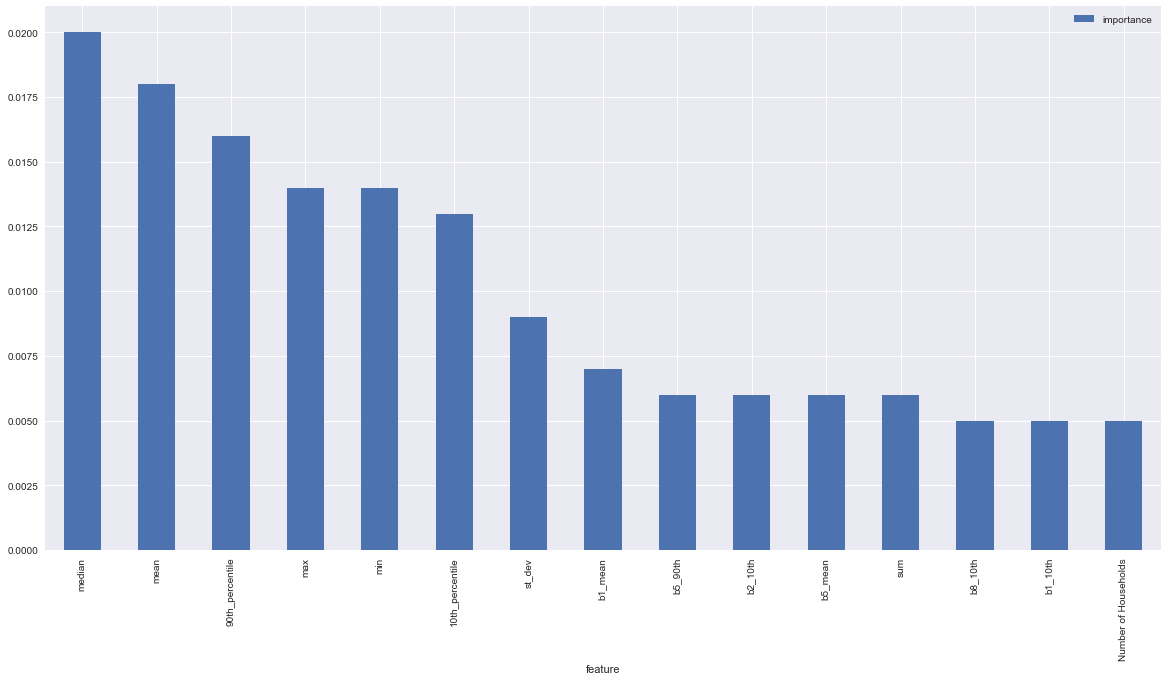

In [26]:
importances.head(15).plot.bar(figsize=(20,10))

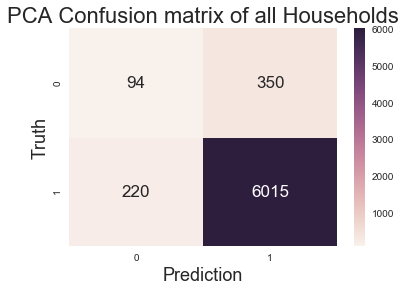

In [27]:
def plot_confusion_matrix(title): 
    predictions = random_forest.predict(X_test)
    conf_matrix = confusion_matrix(Y_testing, predictions)
    heatmap(conf_matrix, annot=True, fmt="d", annot_kws={"size":17})
    plt.xlabel('Prediction', fontsize=18)
    plt.ylabel('Truth', fontsize=18)
    plt.title(title, fontsize=22)
    plt.show()
    
plot_confusion_matrix('PCA Confusion matrix of all Households')

In [28]:
predictions = random_forest.predict(X_test)

In [29]:
# F-Score
from sklearn.metrics import f1_score
f1_score(Y_testing, predictions)

0.9547619047619047

In [30]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_testing, predictions))
print("Recall:",recall_score(Y_testing, predictions))

Precision: 0.945011783189
Recall: 0.96471531676


In [31]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_testing, y_scores)

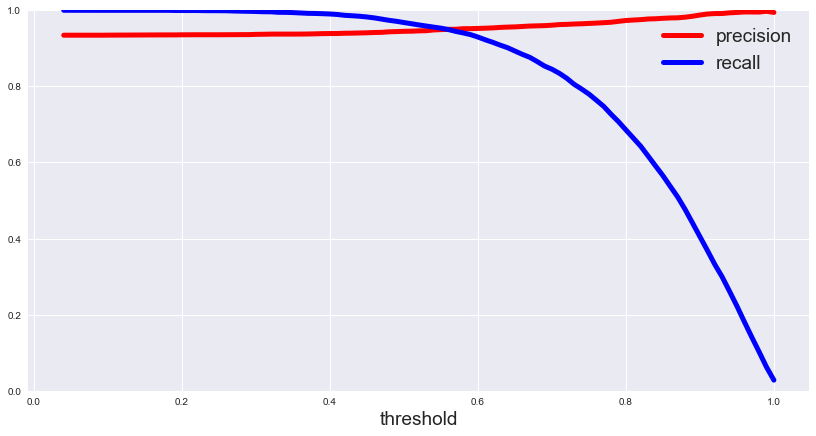

In [32]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

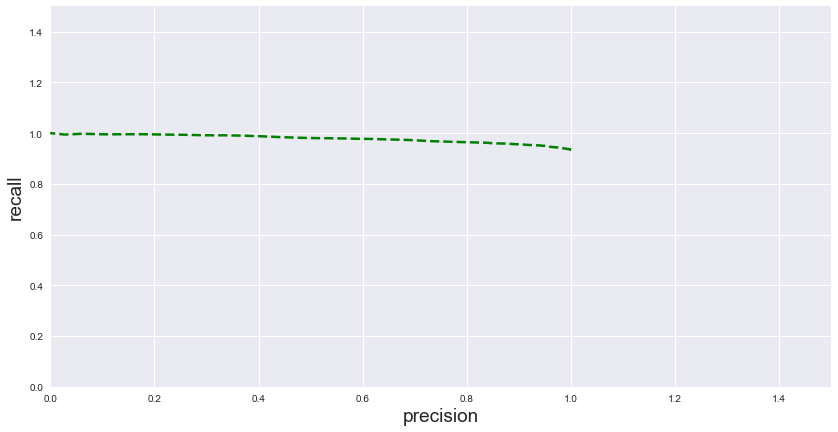

In [33]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

In [34]:
# ROC AUC Curve
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_testing, y_scores)

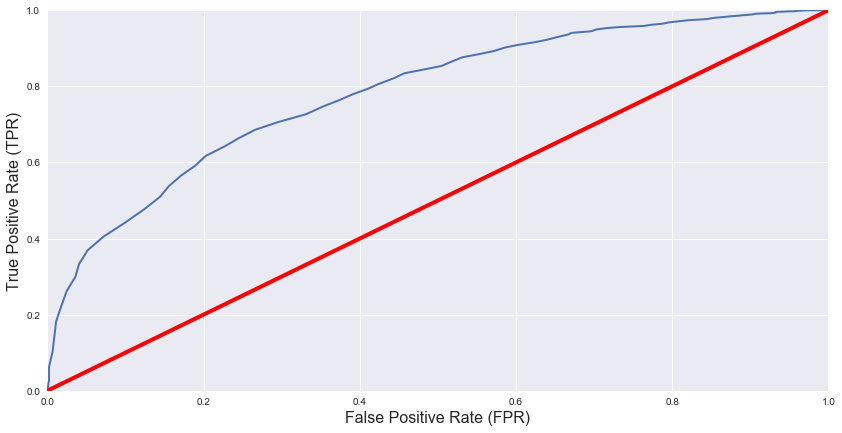

In [35]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_testing, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.782487338983
